In [120]:
# Import relevant libraries

import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [121]:
# Load and read data

health_path = "C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/health_train.csv"
health_data = pd.read_csv(health_path)

In [122]:
# Data sense checking

print(health_data.shape)
health_data.head()

(1584, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,F,0.005,0.000,0.002,0.000,0.0,0.0,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,PA1002,258,127.0,M,0.012,0.000,0.008,0.004,0.0,0.0,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,PA1003,479,145.0,F,0.000,0.000,0.000,0.002,0.0,0.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,PA1004,906,146.0,F,0.004,0.000,0.005,0.003,0.0,0.0,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,PA1005,1921,140.0,F,0.002,0.003,0.006,0.006,0.0,0.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


In [123]:
health_data.target.value_counts()

Low risk         1235
Moderate risk     219
High risk         130
Name: target, dtype: int64

In [124]:
# Categorical / numerical splitting of data

COLUMNS = ["id", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", 
           "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", 
           "x21", "x22", "x23", "x24"]

CATEGORICAL_COLUMNS = ["x3", "x14"]

NUMERICAL_COLUMNS = ["x1", "x2", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13",
                    "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24"]

health_numeric = pd.DataFrame(health_data[NUMERICAL_COLUMNS])
health_categoric = pd.DataFrame(health_data[CATEGORICAL_COLUMNS])

In [125]:
"""
# Correlation chart between variables

px.imshow(health_data.corr(),title = "Correlation Plot of Health Data Attributes")
"""

'\n# Correlation chart between variables\n\npx.imshow(health_data.corr(),title = "Correlation Plot of Health Data Attributes")\n'

In [126]:
# Categoric data sense checking

print(health_categoric.x3.value_counts())
print(health_categoric.x14.value_counts())

M    842
F    742
Name: x3, dtype: int64
O+     410
A+     328
B+     307
A-     165
B-     154
O-     146
AB+     57
AB-     17
Name: x14, dtype: int64


In [127]:
categoric_stats = health_data[CATEGORICAL_COLUMNS].describe()

for column in CATEGORICAL_COLUMNS:
    categoric_stats.loc["missing", column] = health_data[column].isnull().sum()
    categoric_stats.loc["values", column] = health_data[column].unique()
    
print(categoric_stats)

             x3                                 x14
count      1584                                1584
unique        2                                   8
top           M                                  O+
freq        842                                 410
missing       0                                   0
values   [F, M]  [O+, A+, B+, O-, A-, B-, AB-, AB+]


In [128]:
# Categoric visualisations - commented out to save repeated running of code

"""
plt.figure(figsize=(7,4))
sns.countplot(x = 'x3', hue = 'target', palette = "coolwarm", data = health_data)
# plt.savefig('Risk spread split attribute x3' + '.jpg')
"""

'\nplt.figure(figsize=(7,4))\nsns.countplot(x = \'x3\', hue = \'target\', palette = "coolwarm", data = health_data)\n# plt.savefig(\'Risk spread split attribute x3\' + \'.jpg\')\n'

In [129]:
# Categoric visualisations - commented out to save repeated running of code

"""
plt.figure(figsize=(7,4))
sns.countplot(x = 'x14', hue = 'target', palette = "coolwarm", data = health_data)
# plt.savefig('Risk spread split attribute x14' +  '.jpg')
"""

'\nplt.figure(figsize=(7,4))\nsns.countplot(x = \'x14\', hue = \'target\', palette = "coolwarm", data = health_data)\n# plt.savefig(\'Risk spread split attribute x14\' +  \'.jpg\')\n'

In [130]:
# Numeric data sense checking

print(health_numeric.shape)

numeric_stats = health_data[NUMERICAL_COLUMNS].describe()
for column in NUMERICAL_COLUMNS:
    numeric_stats.loc['median',column] = health_data[column].median()
    numeric_stats.loc['missing',column] = health_data[column].isnull().sum()
    
print(numeric_stats)

(1584, 22)
                  x1           x2           x4           x5           x6  \
count    1584.000000  1584.000000  1584.000000  1540.000000  1584.000000   
mean     1053.188131   133.297980     0.003169     0.009906     0.004347   
std       615.996716    10.002632     0.003821     0.048627     0.002948   
min         0.000000   106.000000     0.000000     0.000000     0.000000   
25%       523.750000   126.000000     0.000000     0.000000     0.002000   
50%      1049.500000   133.000000     0.002000     0.000000     0.004000   
75%      1583.250000   141.000000     0.006000     0.003000     0.007000   
max      2125.000000   160.000000     0.019000     0.477000     0.014000   
median   1049.500000   133.000000     0.002000     0.000000     0.004000   
missing     0.000000     0.000000     0.000000    44.000000     0.000000   

                  x7           x8           x9          x10          x11  ...  \
count    1584.000000  1567.000000  1584.000000  1557.000000  1584.00000

In [131]:
# Splitting target attribute

health_data_high = health_data.loc[(health_data.target.str.strip()=='High risk')]
health_data_med = health_data.loc[(health_data.target.str.strip()=='Moderate risk')]
health_data_low = health_data.loc[(health_data.target.str.strip()=='Low risk')]

In [132]:
# Numeric visualisations - commented out to save repeated running of code

"""
# KDE plots

for column in NUMERICAL_COLUMNS:
    plt.figure()
    sns.kdeplot(data = health_data_high[column], label = "High risk", fill = True)
    sns.kdeplot(data = health_data_med[column], label = "Moderate risk", fill = True)
    sns.kdeplot(data = health_data_low[column], label = "Low risk", fill = True)
    plt.legend()
    plt.title("Distribution of " + column)
    # plt.savefig('Distribution of ' + column + '.jpg')
"""

'\n# KDE plots\n\nfor column in NUMERICAL_COLUMNS:\n    plt.figure()\n    sns.kdeplot(data = health_data_high[column], label = "High risk", fill = True)\n    sns.kdeplot(data = health_data_med[column], label = "Moderate risk", fill = True)\n    sns.kdeplot(data = health_data_low[column], label = "Low risk", fill = True)\n    plt.legend()\n    plt.title("Distribution of " + column)\n    # plt.savefig(\'Distribution of \' + column + \'.jpg\')\n'

In [133]:
# Numeric visualisations - commented out to save repeated running of code

"""
# Bar graphs

for column in NUMERICAL_COLUMNS:
    sns.catplot(x = 'x3', y = column, hue = "target", kind = "bar", data = health_data, height=5, aspect=1.8)
        # plt.savefig('Risk multibar of ' + column + '.jpg')
"""

'\n# Bar graphs\n\nfor column in NUMERICAL_COLUMNS:\n    sns.catplot(x = \'x3\', y = column, hue = "target", kind = "bar", data = health_data, height=5, aspect=1.8)\n        # plt.savefig(\'Risk multibar of \' + column + \'.jpg\')\n'

In [134]:
# Numeric visualisations - commented out to save repeated running of code

"""
# Violin plots

for column in NUMERICAL_COLUMNS:
    sns.catplot(x = 'x3', y = column, hue = "target",  kind="violin", data = health_data, height=5, aspect=1.8)
        # plt.savefig('Risk violin plot of ' + column + '.jpg')
"""

'\n# Violin plots\n\nfor column in NUMERICAL_COLUMNS:\n    sns.catplot(x = \'x3\', y = column, hue = "target",  kind="violin", data = health_data, height=5, aspect=1.8)\n        # plt.savefig(\'Risk violin plot of \' + column + \'.jpg\')\n'

In [135]:
# Numeric visualisations - commented out to save repeated running of code

"""
# Scatter plots

for column in NUMERICAL_COLUMNS:
        sns.catplot(x = 'x3', y = column, hue = "target", data = health_data, height=5, aspect=1.8)
        # plt.savefig('Scatter Graph of ' + column + '.jpg')
"""

'\n# Scatter plots\n\nfor column in NUMERICAL_COLUMNS:\n        sns.catplot(x = \'x3\', y = column, hue = "target", data = health_data, height=5, aspect=1.8)\n        # plt.savefig(\'Scatter Graph of \' + column + \'.jpg\')\n'

__Encoding categoric variables__

In [136]:
# Confirming categoric attributes for encoding

health_data.select_dtypes(include = ['object']).columns

Index(['id', 'x3', 'x14', 'target'], dtype='object')

In [137]:
# Encoding categoric data

import category_encoders as ce
enc = ce.OrdinalEncoder(cols=['id', 'x3', 'x14'], return_df = True)
health_data_encoded = enc.fit_transform(health_data)

In [138]:
# Sense check encoded data

print(health_data_encoded.shape)
health_data_encoded.head()

(1584, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,1,1406,145.0,1,0.005,0.000,0.002,0.000,0.0,0.0,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,2,258,127.0,2,0.012,0.000,0.008,0.004,0.0,0.0,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,3,479,145.0,1,0.000,0.000,0.000,0.002,0.0,0.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,4,906,146.0,1,0.004,0.000,0.005,0.003,0.0,0.0,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,5,1921,140.0,1,0.002,0.003,0.006,0.006,0.0,0.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


__Dealing with missing data__

In [139]:
#Identify missing data

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(health_data_encoded)

,Total,Percent
x5,44,2.777778
x10,27,1.704545
x8,17,1.073232
id,0,0.000000
x15,0,0.000000
x24,0,0.000000
x23,0,0.000000
x22,0,0.000000
x21,0,0.000000
x20,0,0.000000


In [140]:
# X/y split

X = health_data_encoded[COLUMNS]
y = health_data_encoded.target

In [141]:
# Imputation of missing data followed by concatenating back X and y into single DF

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

health_data_imputed = my_imputer.fit_transform(X)
health_data_imputed = pd.DataFrame(health_data_imputed)
health_data_imputed.columns = X.columns
health_data_imputed["target"] = health_data.target
print(health_data_imputed.shape)
health_data_imputed.head()

(1584, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,1.0,1406.0,145.0,1.0,0.005,0.000,0.002,0.000,0.0,0.0,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,2.0,258.0,127.0,2.0,0.012,0.000,0.008,0.004,0.0,0.0,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,3.0,479.0,145.0,1.0,0.000,0.000,0.000,0.002,0.0,0.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,4.0,906.0,146.0,1.0,0.004,0.000,0.005,0.003,0.0,0.0,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,5.0,1921.0,140.0,1.0,0.002,0.003,0.006,0.006,0.0,0.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


In [142]:
# Sense check to ensure no missing data.

missing_data(health_data_imputed)

,Total,Percent
id,0,0.0
x1,0,0.0
x24,0,0.0
x23,0,0.0
x22,0,0.0
x21,0,0.0
x20,0,0.0
x19,0,0.0
x18,0,0.0
x17,0,0.0


In [143]:
# Saving the result to csv

health_data_imputed.to_csv("C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/health_data_imputed.csv", index=False)

__Check & remove outliers.__



In [144]:
# Box plots to check visually for outliers.  Also relevant are the previously produced scatter plots.
# Commented out to save repeated running of code

"""
for column in NUMERICAL_COLUMNS:
    sns.catplot(x = 'x3', y = column, hue = "target", kind = "box", data = health_data_imputed, height=5, aspect=1.8)
    # plt.savefig('Box plot - risk by ' + column + '.jpg')

"""

'\nfor column in NUMERICAL_COLUMNS:\n    sns.catplot(x = \'x3\', y = column, hue = "target", kind = "box", data = health_data_imputed, height=5, aspect=1.8)\n    # plt.savefig(\'Box plot - risk by \' + column + \'.jpg\')\n\n'

__Considering outliers from graphic box / scatter plots.__

- Scatter plot outliers = x11, x13, x17, x19, x23
- box plot outliers     = x10, x11, x12, x13, x17, x19, x23

Consistent across both are x11, x13, x17, x19, x23

In [145]:
# New X/y

outlier_features = ["x11", "x13", "x17", "x19", "x23"]

# "id" removed - not a useful metric for analysis

X = health_data_imputed[outlier_features]
y = health_data_imputed.target

In [146]:
# Outlier detection - DBScan

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 3, eps = 4)
clusters = outlier_detection.fit_predict(X)
TotalOutliers = list(clusters).count(-1)
print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

[ 0  1  0 ...  0  0 28]
Total number of outliers identified is:  249


- DBScan min_samples = 4 and eps = 3 --> 559 outliers
- DBScan min_samples = 4 and eps = 3 --> 470 outliers
- DBScan min_samples = 3 and eps = 4 --> 249 outliers

In [147]:
# Outlier detection - IsolationForest

from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
print(preds)
totalOutliers = 0
for pred in preds:
    if pred == -1:
        totalOutliers = totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

[ 1 -1  1 ...  1  1 -1]
Total number of outliers identified is:  344


In [148]:
# Outlier detection - LocalOutlierFactor

from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Total number of outliers predicted is: ",outlierN)

Predicted outliers: 
 [1 1 1 ... 1 1 1]
Total number of outliers predicted is:  159


In [149]:
# Mid point in these is DBScan with min_samples 3 and eps 4

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 3, eps = 4)
clusters = outlier_detection.fit_predict(X)
TotalOutliers = list(clusters).count(-1)
print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

[ 0  1  0 ...  0  0 28]
Total number of outliers identified is:  249


In [150]:
# Mask to select all rows that are not outliers (rest of data added back in to ensure outlier removal is across whole data set)


X = health_data_imputed[COLUMNS]
y = health_data_imputed.target

mask = clusters != -1

X_OL = X[mask]
print(X_OL.shape)
y_OL = y[mask]
print (y_OL.shape)

(1335, 25)
(1335,)


In [151]:
health_data_imputed_OL = pd.concat([X_OL, y_OL], axis = "columns")
health_data_imputed_OL.to_csv("C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/health_data_imputed_OL.csv", index = False)

In [152]:
print(health_data_imputed_OL.shape)
health_data_imputed_OL.head()

(1335, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,1.0,1406.0,145.0,1.0,0.005,0.000,0.002,0.000,0.0,0.0,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,2.0,258.0,127.0,2.0,0.012,0.000,0.008,0.004,0.0,0.0,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,3.0,479.0,145.0,1.0,0.000,0.000,0.000,0.002,0.0,0.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,4.0,906.0,146.0,1.0,0.004,0.000,0.005,0.003,0.0,0.0,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,5.0,1921.0,140.0,1.0,0.002,0.003,0.006,0.006,0.0,0.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


__Balancing the data set__

In [153]:
# Loading in data set once outliers have been removed and missing data imputed

data_path = "C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/health_data_imputed_OL.csv"
health_data_new = pd.read_csv(data_path)

In [154]:
# Spread of target variable

print(health_data_new.target.value_counts())

Low risk         1057
Moderate risk     201
High risk          77
Name: target, dtype: int64


In [155]:
# New X/y

X = health_data_new[COLUMNS]
y = health_data_new.target

In [156]:
# Upscale the minority classes as opposed to downscale the majority classes

from sklearn.utils import resample

resampling = X.copy()
resampling['target']= y.values

majority_class = resampling[resampling['target'] == 'Low risk']
minority_class_1 = resampling[resampling['target'] == 'Moderate risk']
minority_class_2 = resampling[resampling['target'] == 'High risk']

minority_1_upsampled = resample(minority_class_1,
                               replace = True,
                               n_samples = 1057,
                               random_state = 123)

minority_2_upsampled = resample(minority_class_2,
                               replace = True,
                               n_samples = 1057,
                               random_state = 123)

upsampled_1 = pd.concat([majority_class, minority_1_upsampled])

upsampled_2 = pd.concat([upsampled_1, minority_2_upsampled])

upsampled_2.target.value_counts()

Low risk         1057
Moderate risk    1057
High risk        1057
Name: target, dtype: int64

In [157]:
print(upsampled_2.shape)
upsampled_2.head()

(3171, 26)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,1.0,1406.0,145.0,1.0,0.005,0.000,0.002,0.000,0.0,0.0,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,2.0,258.0,127.0,2.0,0.012,0.000,0.008,0.004,0.0,0.0,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,3.0,479.0,145.0,1.0,0.000,0.000,0.000,0.002,0.0,0.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,4.0,906.0,146.0,1.0,0.004,0.000,0.005,0.003,0.0,0.0,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,5.0,1921.0,140.0,1.0,0.002,0.003,0.006,0.006,0.0,0.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk


In [158]:
health_data_working  = upsampled_2
health_data_working.to_csv("C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/health_data_working.csv", index = False)

__Splitting training & validation data__.

In [159]:
#Training and validation data split (80% / 20%)

VALIDATION_SIZE = 0.2
RANDOM_STATE = 2018

training, validation = train_test_split(health_data_working, 
                                        test_size = VALIDATION_SIZE, 
                                        random_state = RANDOM_STATE, 
                                        shuffle = True )

print(f"The shape of the health data training sample is;\n{training.shape}")
print(f"The shape of the health data validation sample is;\n{validation.shape}")

The shape of the health data training sample is;
(2536, 26)
The shape of the health data validation sample is;
(635, 26)


At this stage we have;

1) Data loaded, sense schecked and initial visualisations produced.
2) Categoric attributes have been encoded.
3) Missing data has been removed.
4) Outliers have been identified and rows relating removed
5) __No work has been done on feature construction__.  This is to be done on latter iterations.
6) Feature selection algorithm has __not__ been run as this notebook intends to look at Decision Tree classifier.
7) Train and validation data sets have been produced.

Relevant data sets are;

1) __health_data__.  This is the initial raw data set.
2) __health_data_encoded__.  This is the data after categoric attributes were encoded.
3) __health_data_imputed__.  This is the data after imputation of missing data.
4) __health_data_working__.  This is the data set after outliers and balancing operations
4) __training__.  80% of the original data set, encoded and with rows removed where missing data existed.  __This is the training data set__.
5) __validation__.  20% of the original data set, encoded and with rows removed where missing data existed.  __This is the validation data set__.

__Classifier - Decision Tree__.

In [160]:
columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24']

target = "target"

In [161]:
# Associating X / y 

training_X = training[columns]
training_y = training[target].values
validation_X = validation[columns]
validation_y = validation[target].values

In [162]:
# Defining the classifier

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy')

In [163]:
# Fitting the training data

decision_tree.fit(training_X, training_y)

DecisionTreeClassifier(criterion='entropy')

In [164]:
# Predicted labels on validation data given the model we've run the training data on

y_hat = decision_tree.predict(validation_X)
y_hat

array(['Low risk', 'High risk', 'Low risk', 'Low risk', 'Moderate risk',
       'Low risk', 'High risk', 'Moderate risk', 'High risk', 'High risk',
       'Low risk', 'Low risk', 'Low risk', 'High risk', 'Moderate risk',
       'Low risk', 'Moderate risk', 'Moderate risk', 'High risk',
       'Moderate risk', 'Low risk', 'Low risk', 'High risk', 'Low risk',
       'Low risk', 'Low risk', 'Moderate risk', 'High risk', 'High risk',
       'High risk', 'Low risk', 'High risk', 'Moderate risk', 'Low risk',
       'Low risk', 'Low risk', 'Moderate risk', 'Low risk', 'High risk',
       'Moderate risk', 'Moderate risk', 'Moderate risk', 'High risk',
       'Low risk', 'Low risk', 'Moderate risk', 'High risk', 'High risk',
       'High risk', 'Low risk', 'High risk', 'High risk', 'Low risk',
       'Low risk', 'Moderate risk', 'Low risk', 'Moderate risk',
       'Low risk', 'High risk', 'High risk', 'Moderate risk', 'Low risk',
       'Low risk', 'High risk', 'Low risk', 'Low risk', 'Moderate

In [165]:
# Probability scoring

y_hat_proba = decision_tree.predict_proba(validation_X)
y_hat_proba

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [166]:
# Evaluating accuracy across the training data

decision_tree.score(training_X, training_y)
acc = round(decision_tree.score(training_X, training_y) * 100, 2)
print("Decision Tree accuracy (train set):", acc)

Decision Tree accuracy (train set): 100.0


In [167]:
# Evaluating accuracy across the validation data

decision_tree.score(validation_X, validation_y)
acc = round(decision_tree.score(validation_X, validation_y) * 100, 2)
print("Decision accuracy (validation set):", acc)

Decision accuracy (validation set): 98.58


In [168]:
# Load and read test data

test_data_path = "C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/health_test.csv"
test_data = pd.read_csv(test_data_path)

In [169]:
# Sense check test data

print(test_data.shape)
test_data.head()

(528, 25)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,PA3001,767,135,F,0.000,0.0,0.000,0.0,0.0,0.0,...,76,67,143,2,0,137,136,138,0,1
1,PA3002,1592,134,F,0.000,0.0,0.010,0.0,0.0,0.0,...,74,89,163,7,1,138,134,138,13,0
2,PA3003,1115,122,M,0.000,0.0,0.000,0.0,0.0,0.0,...,39,103,142,1,0,120,120,122,3,0
3,PA3004,299,148,F,0.000,NaN,0.000,0.0,0.0,0.0,...,14,139,153,1,0,150,148,150,0,1
4,PA3005,1194,133,M,0.003,0.0,0.005,0.0,0.0,0.0,...,58,113,171,5,1,150,147,149,5,0


In [170]:
# Encode test_data

enc = ce.OrdinalEncoder(cols=['id', 'x3', 'x14'], return_df = True)
test_data = enc.fit_transform(test_data)

In [171]:
# Check for missing data in test data

missing_data(test_data)

,Total,Percent
x5,13,2.462121
x10,11,2.083333
x8,6,1.136364
id,0,0.000000
x14,0,0.000000
x23,0,0.000000
x22,0,0.000000
x21,0,0.000000
x20,0,0.000000
x19,0,0.000000


In [172]:
COLUMNS = ["id", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", 
           "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", 
           "x21", "x22", "x23", "x24"]

X = test_data[COLUMNS]

In [173]:
# impute missing values from test data (consistent approach with training data)

test_data = my_imputer.fit_transform(X)
test_data = pd.DataFrame(test_data)
test_data.columns = X.columns
print(test_data.shape)
test_data.head()

(528, 25)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,1.0,767.0,135.0,1.0,0.000,0.000000,0.000,0.0,0.0,0.0,...,76.0,67.0,143.0,2.0,0.0,137.0,136.0,138.0,0.0,1.0
1,2.0,1592.0,134.0,1.0,0.000,0.000000,0.010,0.0,0.0,0.0,...,74.0,89.0,163.0,7.0,1.0,138.0,134.0,138.0,13.0,0.0
2,3.0,1115.0,122.0,2.0,0.000,0.000000,0.000,0.0,0.0,0.0,...,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0
3,4.0,299.0,148.0,1.0,0.000,0.006779,0.000,0.0,0.0,0.0,...,14.0,139.0,153.0,1.0,0.0,150.0,148.0,150.0,0.0,1.0
4,5.0,1194.0,133.0,2.0,0.003,0.000000,0.005,0.0,0.0,0.0,...,58.0,113.0,171.0,5.0,1.0,150.0,147.0,149.0,5.0,0.0


In [174]:
# Predict for test data using the tertiary trained model

testing_X = test_data[columns]
prediction_y = decision_tree.predict(testing_X)

In [175]:
# Saving the result to csv

submission3 = pd.DataFrame({"id": test_data["id"],"target": prediction_y})
submission3.to_csv("C:/Users/patri/Desktop/MSc Computing Science/Data Mining/Assignment Two/Data sets/submission_3_decision_tree.csv", index=False)

Submission "id" has been encoded.  Manual copy of raw "id" into submission for consistency.

Assessing similarity between classifier and raw / imputed & outlier data sets

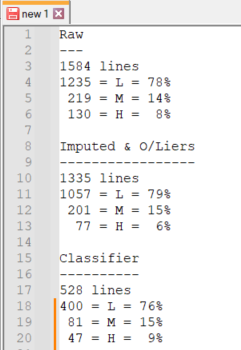
